In [72]:
import sys
from pathlib import Path

# Add project root to sys.path
project_root = Path().resolve().parent
sys.path.append(str(project_root))

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from src.config import RAW_DATA_PATH

In [74]:
# Load the dataset
df = pd.read_csv(RAW_DATA_PATH)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<h2>1. Exploratory Data Analysis<h2>


In [75]:
df.shape

(7043, 21)

In [76]:
df.info

<bound method DataFrame.info of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL 

In [77]:
df.describe()   

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Notices some numerical columns are actually categorical (e.g. "SeniorCitizen") and "TotalCharges" is object due to some non-numeric values.

In [78]:
# List of categorical and numerical columns
categorical_cols = df.select_dtypes(include="object").columns.tolist()
numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()

print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)

Categorical Columns: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']
Numerical Columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges']


In [79]:
# Converting "TotalCharges" to numeric, coercing errors to NaN
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Converting 'SeniorCitizen' from numerical to categorical
df["SeniorCitizen"] = df["SeniorCitizen"].map({0: "No", 1: "Yes"})

In [80]:
# Confirm the changes
categorical_cols = df.select_dtypes(include="object").columns.tolist()
numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()

print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)

Categorical Columns: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
Numerical Columns: ['tenure', 'MonthlyCharges', 'TotalCharges']


In [81]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [82]:
# Check rows with missing TotalCharges
df[df["TotalCharges"].isnull()]   

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,No,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,No,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


All the rows with missing values, has <b>tenure</b> as <b>"zero"</b> <br>
    <b>TotalCharges = MonthlyCharges * tenure;</b>                      <br>
    So basically it is not a missing value, the value is "zero" 

In [83]:
# replacing all th emissing values of TotalCharges with 0
df["TotalCharges"].fillna(0, inplace=True)

C:\Users\Vishnu.K\AppData\Local\Temp\ipykernel_23240\1889866626.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TotalCharges"].fillna(0, inplace=True)


<h2>2. Target Variable Analysis</h2>

In [84]:
df["Churn"].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [85]:
df["Churn"].value_counts(normalize=True) * 100

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

Insight : Approx. 26% of customers churned

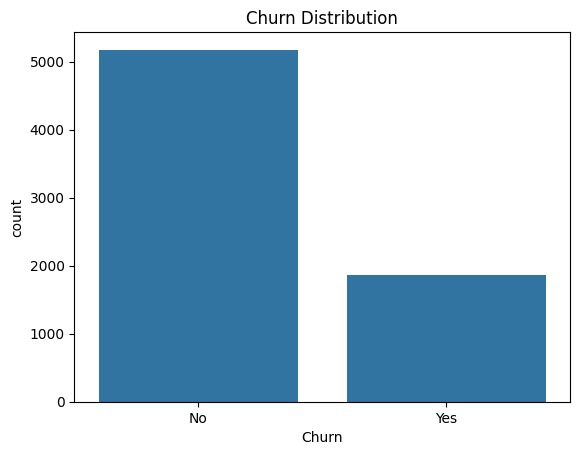

In [86]:
sns.countplot(x="Churn", data=df)
plt.title("Churn Distribution")
plt.show()

<h2>3. MonthlyCharges & TotalCharges Distribution</h2>

In [87]:
df["MonthlyCharges"].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

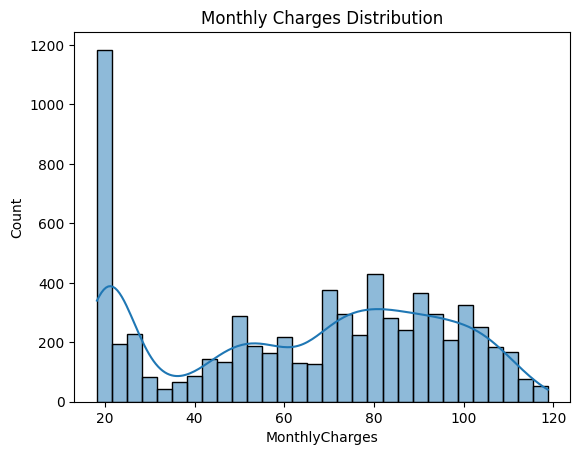

In [88]:
sns.histplot(df["MonthlyCharges"], bins=30, kde=True)
plt.title("Monthly Charges Distribution")
plt.show()

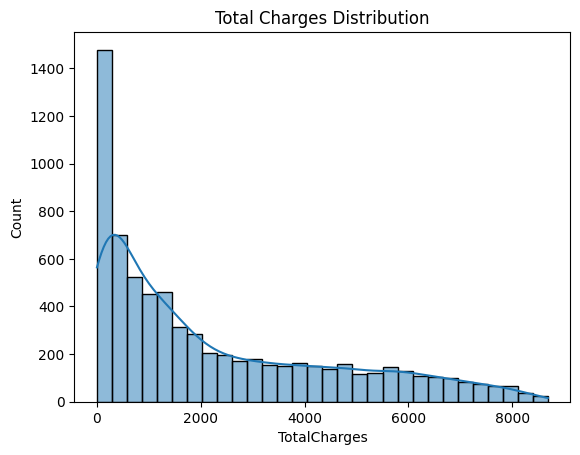

In [89]:
sns.histplot(df["TotalCharges"], bins=30, kde=True)
plt.title("Total Charges Distribution")
plt.show()

<h2>4. Monthly Charges & Churn Relationship</h2>

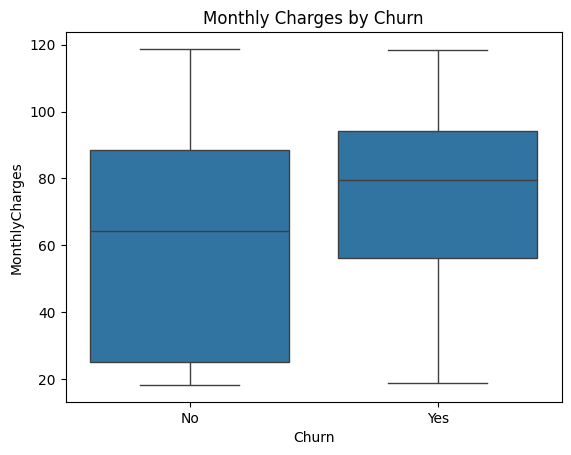

In [90]:
sns.boxplot(x="Churn", y="MonthlyCharges", data=df)
plt.title("Monthly Charges by Churn")
plt.show()

This indicates high-paying customers are churning more

<h2>5. Tenure & Churn Relationship</h2>

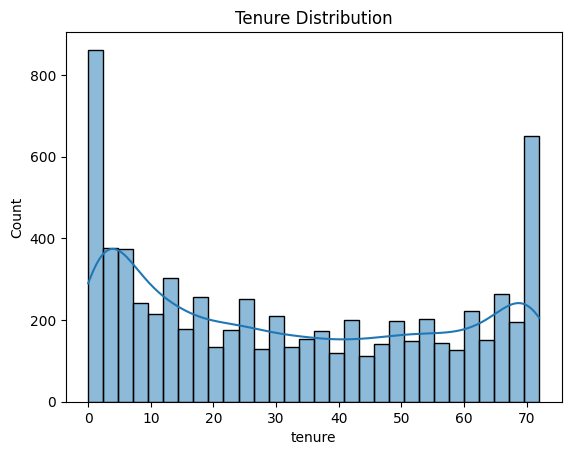

In [91]:
sns.histplot(df["tenure"], bins=30, kde=True)
plt.title("Tenure Distribution")
plt.show()

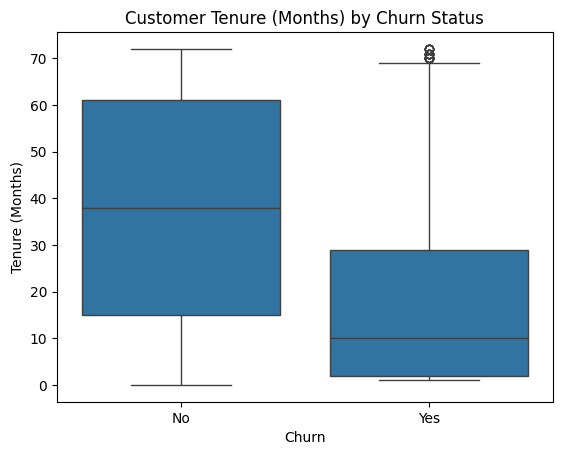

In [92]:
sns.boxplot(x="Churn", y="tenure", data=df)
plt.ylabel("Tenure (Months)")
plt.title("Customer Tenure (Months) by Churn Status")
plt.show()

In [93]:
df.groupby("Churn")[["tenure", "MonthlyCharges", "TotalCharges"]].median()

,tenure,MonthlyCharges,TotalCharges
Churn,,,
No,38.0,64.425,1679.525
Yes,10.0,79.650,703.550


<b>Insights:</b> <br>
<ul><li>
New customers churn heavily.</li><li>
High monthly cost increases churn risk.</li><li>
Since tenure is low, total accumulated value is low.</li></ul>

In [94]:
pd.crosstab(df["Contract"], df["Churn"], normalize="index") * 100

Churn,No,Yes
Contract,,
Month-to-month,57.290323,42.709677
One year,88.730482,11.269518
Two year,97.168142,2.831858


In [95]:
exclude_cols = ["customerID", "Churn"]

categorical_cols = [
    col for col in df.select_dtypes(include="object").columns
    if col not in exclude_cols
]

for col in categorical_cols:
    print(f"\n---- {col} ----")
    print(pd.crosstab(df[col], df["Churn"], normalize="index") * 100)


---- gender ----
Churn          No        Yes
gender                      
Female  73.079128  26.920872
Male    73.839662  26.160338

---- SeniorCitizen ----
Churn                 No        Yes
SeniorCitizen                      
No             76.393832  23.606168
Yes            58.318739  41.681261

---- Partner ----
Churn           No        Yes
Partner                      
No       67.042021  32.957979
Yes      80.335097  19.664903

---- Dependents ----
Churn              No        Yes
Dependents                      
No          68.720860  31.279140
Yes         84.549763  15.450237

---- PhoneService ----
Churn                No        Yes
PhoneService                      
No            75.073314  24.926686
Yes           73.290363  26.709637

---- MultipleLines ----
Churn                    No        Yes
MultipleLines                         
No                74.955752  25.044248
No phone service  75.073314  24.926686
Yes               71.390104  28.609896

---- InternetServic

<ul>
<li>
Contract type is the strongest churn driver: <b>Month-to-month customers</b> show ~43% churn, compared to ~11% (one-year) and ~3% (two-year). Long-term contracts significantly reduce churn.
</li><li>
<b>Fiber optic customers</b> churn heavily (~42%), suggesting higher price sensitivity or unmet expectations.
</li><li>
<b>Lack of add-on services (OnlineSecurity, TechSupport)</b> is strongly associated with churn (~40% vs ~15% when subscribed). Service bundling improves retention.
</li><li>
<b>Electronic check users</b> show the highest churn (~45%), while automatic payment users churn significantly less (~15–17%).
</li><li>
Customers with <b>lower tenure</b> churn more, confirming early lifecycle as a high-risk period.
</li><li>
Family-linked customers (Partner/Dependents) churn less, indicating higher stability.
</li><li>
Gender and PhoneService show minimal impact on churn.
</li>
</ul>

<h2>6. Tenure Lifecycle Analysis</h2>

In [96]:
# Create tenure groups
df["tenure_group"] = pd.cut(
    df["tenure"],
    bins=[-1, 12, 36, 60, 72],
    labels=["0-12 Months", "12-36 Months", "36-60 Months", "60+ Months"]
)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-12 Months
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,12-36 Months
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0-12 Months
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,36-60 Months
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0-12 Months
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,12-36 Months
7039,2234-XADUH,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,60+ Months
7040,4801-JZAZL,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0-12 Months
7041,8361-LTMKD,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,0-12 Months


In [97]:
# Churn rate by lifecycle
pd.crosstab(df["tenure_group"], df["Churn"], normalize="index") * 100

Churn,No,Yes
tenure_group,,
0-12 Months,52.561757,47.438243
12-36 Months,74.461207,25.538793
36-60 Months,83.375157,16.624843
60+ Months,93.390192,6.609808


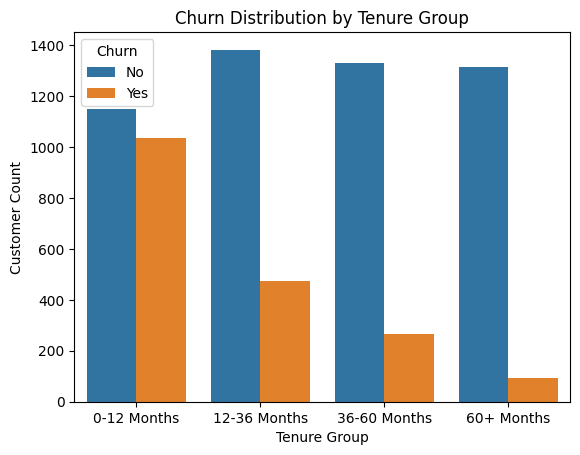

In [98]:
sns.countplot(x="tenure_group", hue="Churn", data=df)
plt.title("Churn Distribution by Tenure Group")
plt.xlabel("Tenure Group")
plt.ylabel("Customer Count")
plt.show()


<b>Lifecycle-Based Churn Insight</b>
<ul><li>
Nearly 47% of customers churn within their first 12 months, indicating high early-stage risk.
</li><li>
Churn drops significantly after the first year (to ~25%).
</li><li>
Long-term customers (60+ months) exhibit very low churn (~6%), indicating strong loyalty.
</li><li>
Customer lifetime value increases substantially once customers cross the 12-month threshold.
</li></ul>


<h2>7. Churn Rate by Contract × Tenure Group</h2>

In [99]:
pd.crosstab(
    [df["tenure_group"], df["Contract"]],
    df["Churn"],
    normalize="index"
) * 100

Churn                                No        Yes
tenure_group Contract                             
0-12 Months  Month-to-month   48.645938  51.354062
             One year         89.516129  10.483871
             Two year        100.000000   0.000000
12-36 Months Month-to-month   64.349959  35.650041
             One year         91.946309   8.053691
             Two year         98.924731   1.075269
36-60 Months Month-to-month   68.909091  31.090909
             One year         86.587436  13.412564
             Two year         96.703297   3.296703
60+ Months   Month-to-month   77.777778  22.222222
             One year         87.859425  12.140575
             Two year         96.855984   3.144016

In [100]:
interaction_table = pd.crosstab(
    [df["tenure_group"], df["Contract"]],
    df["Churn"],
    normalize="index"
) * 100

interaction_table["Yes"].sort_values(ascending=False)

tenure_group  Contract      
0-12 Months   Month-to-month    51.354062
12-36 Months  Month-to-month    35.650041
36-60 Months  Month-to-month    31.090909
60+ Months    Month-to-month    22.222222
36-60 Months  One year          13.412564
60+ Months    One year          12.140575
0-12 Months   One year          10.483871
12-36 Months  One year           8.053691
36-60 Months  Two year           3.296703
60+ Months    Two year           3.144016
12-36 Months  Two year           1.075269
0-12 Months   Two year           0.000000
Name: Yes, dtype: float64

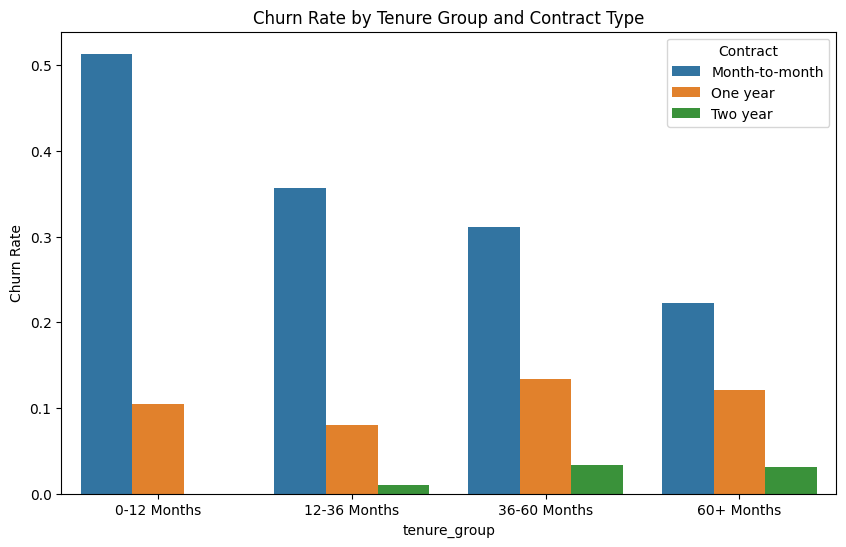

In [101]:
plt.figure(figsize=(10,6))
sns.barplot(
    x="tenure_group",
    y=df["Churn"].map({"No":0,"Yes":1}),
    hue="Contract",
    data=df,
    errorbar=None
)
plt.ylabel("Churn Rate")
plt.title("Churn Rate by Tenure Group and Contract Type")
plt.show()

<b>Contract × Lifecycle Interaction Insight</b>
<ul><li>
The highest churn segment is 0–12 month customers on month-to-month contracts (51%).
</li><li>
Month-to-month contracts exhibit elevated churn across all lifecycle stages.
</li><li>
One-year contracts significantly reduce churn (~8–13%).
</li><li>
Two-year contracts demonstrate near-zero churn across tenure groups.
</li><li>
Contract structure is the strongest driver of customer retention.
</li><ul>